In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston= load_boston()

In [6]:
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df['Price']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
y=df['Price']
x=df.drop("Price",axis=1)

### Assumption 1 - Test of Multicollinearity

In [8]:
Xc=sm.add_constant(x)

model=sm.OLS(y,Xc).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 27 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        11:52:55   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

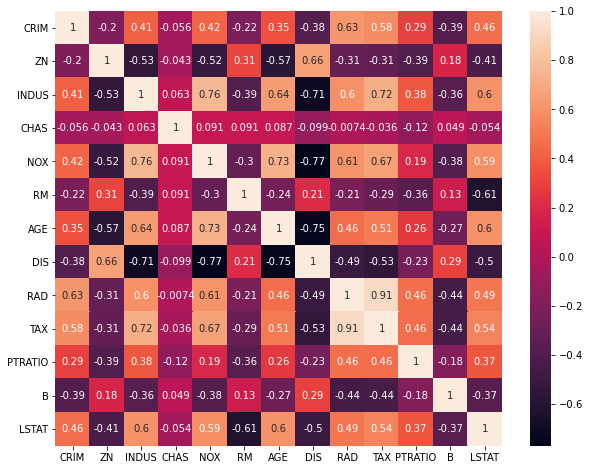

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(x.corr(),annot=True)
plt.show()

**So now we look at VIF**

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
vif=variance_inflation_factor

In [19]:
vf=[vif(Xc.values,i) for i in range(Xc.shape[1])]

In [20]:
pd.DataFrame(vf,index=Xc.columns,columns=['VIF'])

,VIF
const,585.265238
CRIM,1.792192
ZN,2.298758
INDUS,3.991596
CHAS,1.073995
NOX,4.393720
RM,1.933744
AGE,3.100826
DIS,3.955945
RAD,7.484496


**Important Note**

Ensure constant is there in the model before running VIF.
If we build a model without constant, we are forcing the model to pass through origin. Here r^2 will not be reliable. So the VIF values will also not be reliable.

In [22]:
Xc.shape

(506, 14)

**If constant is not present is given below:**

In [25]:
pd.DataFrame([vif(x.values,i) for i in range(x.shape[1])],index=x.columns,columns=['VIF'])

,VIF
CRIM,2.100373
ZN,2.844013
INDUS,14.485758
CHAS,1.152952
NOX,73.894947
RM,77.948283
AGE,21.386850
DIS,14.699652
RAD,15.167725
TAX,61.227274


In [60]:
Xc=Xc.drop(['AGE','INDUS'],axis=1)

In [29]:
vf=[vif(Xc.values,i) for i in range(Xc.shape[1])]
pd.DataFrame(vf,index=Xc.columns,columns=['VIF'])

,VIF
const,579.255845
CRIM,1.789704
ZN,2.239229
CHAS,1.059819
NOX,3.778011
RM,1.834806
DIS,3.443420
RAD,6.861126
TAX,7.272386
PTRATIO,1.757681


### Assumption 2 - Normality of Residuals

In [30]:
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 27 Jan 2021   Prob (F-statistic):          5.54e-137
Time:                        12:14:25   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
residuals=model.resid
print(residuals)

0      -6.124281
1      -3.396528
2       4.166630
3       4.752005
4       8.217359
         ...    
501    -1.137900
502    -1.780817
503    -3.709999
504    -4.111333
505   -10.440843
Length: 506, dtype: float64


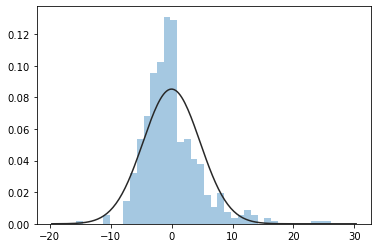

In [37]:
from scipy.stats import norm
norm.fit(residuals)
sns.distplot(residuals,fit=norm,kde=False)
plt.show()

In [39]:
import scipy.stats as stats

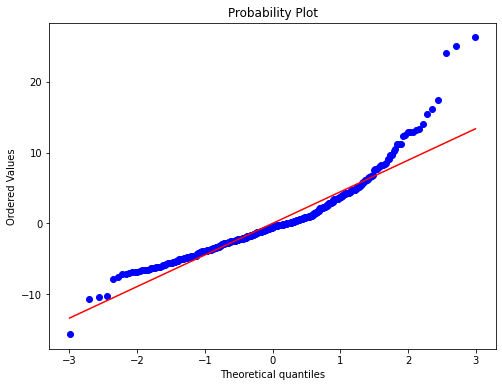

In [44]:
# QQ PLot
plt.figure(figsize=(8,6))
stats.probplot(residuals,plot=plt)
plt.show()

**Jarque-Bera Test (Hypothesis Test)**

In [46]:
print(stats.jarque_bera(residuals))

Jarque_beraResult(statistic=787.7851418746342, pvalue=0.0)


**Important Note Below**

In [49]:
model=sm.OLS(np.log(y),Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     168.1
Date:                Wed, 27 Jan 2021   Prob (F-statistic):          4.31e-159
Time:                        12:35:45   Log-Likelihood:                 129.02
No. Observations:                 506   AIC:                            -234.0
Df Residuals:                     494   BIC:                            -183.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0837      0.203     20.112      0.000       3.685       4.483
CRIM          -0.0103      0.001     -7.856      0.000      -0.013      -0.008
ZN             0.0011      0.001      2.007      0.045    2.28e-05       0.002
CHAS           0.1051      0.034      3.072      0.002       0.038       0.172
NOX           -0.7217      0.142     -5.095      0.000      -1.000      -0.443
RM             0.0907      0.016      5.569      0.000       0.059       0.123
DIS           -0.0517      0.007     -6.948      0.000      -0.066      -0.037
RAD            0.0134      0.003      5.293      0.000       0.008       0.018
TAX           -0.0006      0.000     -4.129      0.000      -0.001      -0.000
PTRATIO       -0.0374      0.005     -7.237      0.000      -0.048      -0.027
B              0.0004      0.000      3.852      0.000       0.000       0.001
LSTAT         -0.0286      0.002    -15.053      0.000      -0.032      -0.025
==============================================================================
Omnibus:                       59.445   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.361
Skew:                           0.459   Prob(JB):                     4.26e-50
Kurtosis:                       6.153   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

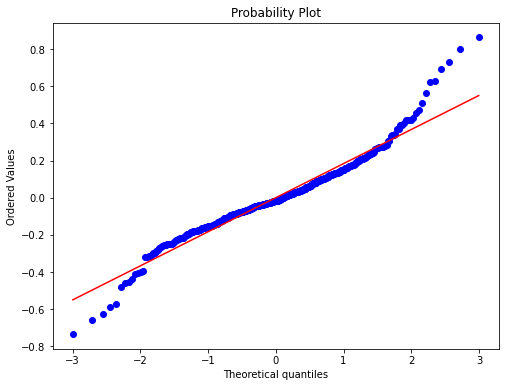

In [50]:
residuals=model.resid
plt.figure(figsize=(8,6))
stats.probplot(residuals,plot=plt)
plt.show()

In [51]:
stats.jarque_bera(residuals)

Jarque_beraResult(statistic=227.36073522664097, pvalue=0.0)

### Assumption 3 - Constant Variance of Residuals (HomoScedasticity)

In [61]:
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 27 Jan 2021   Prob (F-statistic):          5.54e-137
Time:                        13:44:10   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
residuals=model.resid
y_pred=model.predict(Xc)

In [63]:
y_pred

0      30.124281
1      24.996528
2      30.533370
3      28.647995
4      27.982641
         ...    
501    23.537900
502    22.380817
503    27.609999
504    26.111333
505    22.340843
Length: 506, dtype: float64

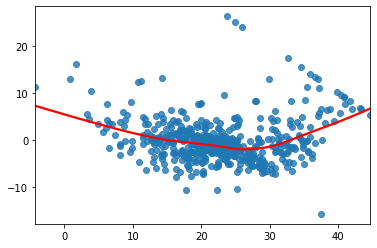

In [64]:
sns.regplot(x=y_pred,y=residuals,lowess=True,line_kws={'color':'red'})
plt.show()

In [65]:
# Goldfeld Quandt Test of Homoscedasticity
import statsmodels.stats.api as sms

In [66]:
gqtest=sms.het_goldfeldquandt(y=residuals,x=Xc)

In [67]:
gqtest

(2.2836707086343977, 1.3454126630538348e-10, 'increasing')

### Assumption 4 - Auto Correlation

In [70]:
import statsmodels.tsa.api as smt

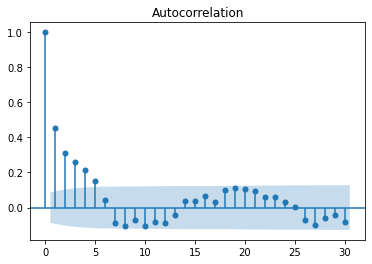

In [73]:
acf=smt.graphics.plot_acf(residuals,lags=30)
acf.show()

### Assumption 5 - Linearity of Relationship

**Linearity of Relationship refers to relationship between y and y_pred. If the model is appropriate, this relationship will be linear.**

In [74]:
model=sm.OLS(y,Xc).fit()
y_pred=model.predict(Xc)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 27 Jan 2021   Prob (F-statistic):          5.54e-137
Time:                        14:15:15   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

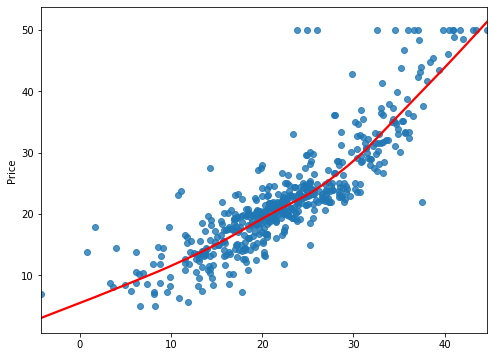

In [76]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_pred,y=y,lowess=True,line_kws={'color':'red'})
plt.show()

In [77]:
import statsmodels.api as sm

In [78]:
sm.stats.diagnostic.linear_rainbow(model)

(0.5781612495333296, 0.9999908142705343)

In [81]:
### Transforming Datasets
df_log=df.transform(lambda x: np.log1p(x))

df_sqrt=df.transform(lambda x: np.sqrt(x))